## Introduction

I have always noticed that traffic seemed to be just a bit worse during bad weather conditions and wondered how much (if any) real impact weather has on traffic. For this case, I chose to test this theory by analyzing traffic volume count data set from NYC OPEN Data from 2012-2018 (TONS of MISSING DATA). I also collected daily weather data from www.wunderground.com. 

Null Hypothesis:  Weather does not have statistically significant impact on traffic volume in NYC. 

Hypotehsis: Weather has statistically significant impact on traffic volume in NYC. 
 
Test: Test hypothesis by running a regression of traffic volument data against weather parameters. Fail to reject null hypothesis if the coefficients are statistically significant and the model is reliable.  


### Data Wrangling

I found two data sets from NYC OPEN Data one from 2012-2013 and the other from 2014-2018. I use both here. 

In [332]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns 

In [333]:
# list all files in current directory
os.listdir()

['.DS_Store',
 'Traffic_Volume_Counts__2014-2018_.csv',
 'config.py',
 'weather_data.csv',
 'weather.xlsx',
 'Traffic_Volume_Counts__2012-2013_.csv',
 'weather.ipynb',
 'README.md',
 'github',
 '.ipynb_checkpoints',
 'NYC_Open_Data_Dictionary-Traffic_Volume_Counts.xlsx',
 'Traffic_Speed.ipynb',
 'LION',
 'Traffic_Volume.ipynb']

In [334]:
df = pd.read_csv('Traffic_Volume_Counts__2014-2018_.csv')
df.shape

(21448, 31)

In [335]:
df2 = pd.read_csv('Traffic_Volume_Counts__2012-2013_.csv')
test_df.shape

(5945, 31)

In [336]:
# Join the two NYC OPEN Data files
df = pd.concat([df2, df], ignore_index=True)

In [337]:
df.head(3)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106.0,74.0,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109.0,74.0,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36.0,28.0,11.0,...,426,425,419,469,425,358,224,185,132,74


In [338]:
df.tail(3)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
27390,367,42098,Utica Avenue,Lenox Road,Linden Boulevard,NB,04/15/2018,415.0,339.0,239.0,...,631,618,520,564,455,481,425,404,317,280
27391,367,42098,Utica Avenue,Lenox Road,Linden Boulevard,SB,04/15/2018,347.0,276.0,225.0,...,527,521,519,466,493,495,401,391,309,270
27392,368,37379,Madison Avenue,East 73 Street,East 74 Street,NB,04/15/2018,1025.0,577.0,435.0,...,1270,1350,1248,1306,1366,1131,1060,859,962,836


In [339]:
print(df.shape)
df.head(3)

(27393, 31)


,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106.0,74.0,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109.0,74.0,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36.0,28.0,11.0,...,426,425,419,469,425,358,224,185,132,74


In [340]:
# Convert Date column into datetime objects
df['Date'] = pd.to_datetime(df.Date)
# Set Date column as index
df = df.set_index('Date')
df = df.sort_index()

In [341]:
print(df.shape)
df.head(3)

(27393, 30)


,ID,Segment ID,Roadway Name,From,To,Direction,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-28,283,105624,FINGERBOARD ROAD,CLEVELAND PLACE,COLUMBIA AVENUE,WB,44.0,31.0,17.0,22.0,...,291,275,267,253,292,255,228,205,144,115
2012-09-28,290,110262,GLEN STREET,BLOOMFIELD AVENUE,FAHY AVE,NB,82.0,53.0,29.0,22.0,...,308,339,311,602,502,375,263,167,137,157
2012-09-28,7,14602,HYLAN BOULEVARD,FINGERBOARD ROAD,RODERICK AVENUE,NB,21.0,15.0,6.0,5.0,...,181,170,117,122,113,120,89,69,67,44


In [342]:
df.tail(2)

,ID,Segment ID,Roadway Name,From,To,Direction,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-15,349,121069,Crotona Avenue,Claremont Parkway,Crotona Avenue North,NB,101.0,62.0,56.0,44.0,...,209,208,213,219,204,192,167,146,90,55
2018-04-15,368,37379,Madison Avenue,East 73 Street,East 74 Street,NB,1025.0,577.0,435.0,358.0,...,1270,1350,1248,1306,1366,1131,1060,859,962,836


#### Narrowing down time window 
Right off the bat, I decided to narrow down the scope of the project to the times between 6am-8pm.  
The assumption being that during these hours commuters are most active.
As such any effect of weather should be more pronounced during this hours. 

In [343]:
# Drop all hours outside 6 am - 8 pm. 
df = df.drop(['12:00-1:00 AM', 
              '1:00-2:00AM', 
              '2:00-3:00AM', 
              '3:00-4:00AM', 
              '4:00-5:00AM', 
              '5:00-6:00AM', 
              '8:00-9:00PM', 
              '9:00-10:00PM', 
              '10:00-11:00PM',
              '11:00-12:00AM'], axis =1)

In [344]:
# Convert all categorical columns to type category for ease of EDA 
df['ID'] = df['ID'].astype('category')
df['Segment ID']= df['Segment ID'].astype('category')
df['Roadway Name'] = df['Roadway Name'].astype('category')
df['Direction'] = df['Direction'].astype('category')
df['From'] = df['From'].astype('category')
df['To'] = df['To'].astype('category')
# df['Month'] = df['Month'].astype('category')
# df['day_of_week'] = df['day_of_week'].astype('category')
# df['is_weekday'] = df['is_weekday'].astype('category')


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27393 entries, 2012-09-28 to 2018-04-15
Data columns (total 20 columns):
ID               27393 non-null category
Segment ID       27393 non-null category
Roadway Name     27393 non-null category
From             27393 non-null category
To               27393 non-null category
Direction        27393 non-null category
6:00-7:00AM      27389 non-null float64
7:00-8:00AM      27389 non-null float64
8:00-9:00AM      27389 non-null float64
9:00-10:00AM     27389 non-null float64
10:00-11:00AM    27390 non-null float64
11:00-12:00PM    27392 non-null float64
12:00-1:00PM     27393 non-null int64
1:00-2:00PM      27393 non-null int64
2:00-3:00PM      27393 non-null int64
3:00-4:00PM      27393 non-null int64
4:00-5:00PM      27393 non-null int64
5:00-6:00PM      27393 non-null int64
6:00-7:00PM      27393 non-null int64
7:00-8:00PM      27393 non-null int64
dtypes: category(6), float64(6), int64(8)
memory usage: 3.7 MB


In [346]:
df.describe()

,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM
count,27389.000000,27389.000000,27389.000000,27389.000000,27390.000000,27392.000000,27393.000000,27393.000000,27393.000000,27393.000000,27393.000000,27393.000000,27393.000000,27393.000000
mean,419.503012,570.488560,622.475574,608.016101,608.616137,630.517341,654.040886,675.801738,719.525572,748.952616,753.743146,752.013069,725.972986,665.936918
std,735.447733,818.160251,825.297056,801.417376,794.204758,806.590434,823.324827,847.573881,889.536731,911.644680,906.461134,898.625696,894.285627,860.299920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.000000,138.000000,179.000000,192.000000,202.000000,215.000000,229.000000,239.000000,260.000000,270.000000,273.000000,272.000000,252.000000,218.000000
50%,169.000000,293.000000,349.000000,340.000000,345.000000,364.000000,384.000000,397.000000,427.000000,448.000000,453.000000,451.000000,426.000000,375.000000
75%,383.000000,605.000000,662.000000,623.000000,615.000000,641.000000,670.000000,693.000000,742.000000,786.000000,800.000000,803.000000,761.000000,676.000000
max,7513.000000,9226.330000,7899.000000,6766.000000,6430.000000,6307.000000,6330.000000,6119.000000,6996.000000,7524.000000,8683.000000,9762.000000,9879.000000,10532.000000


In [358]:
# Check number of unique dates 
df.index.unique()

DatetimeIndex(['2012-09-28', '2012-09-29', '2012-09-30', '2012-10-01',
               '2012-10-02', '2012-10-03', '2012-10-04', '2012-10-05',
               '2012-10-06', '2012-10-07',
               ...
               '2018-03-15', '2018-04-07', '2018-04-08', '2018-04-09',
               '2018-04-10', '2018-04-11', '2018-04-12', '2018-04-13',
               '2018-04-14', '2018-04-15'],
              dtype='datetime64[ns]', name='Date', length=437, freq=None)

In [295]:
# Count the number of unique segments 
# Segments are Location IDs for a unique intersection
len(df['Segment ID'].unique())

1629

### Description of the Data: 
* Looking at the number of unique dates we can see there are 437 days in the data set for the readings.
  * Meaning there are a lot of missing dates (out of over 1300 days in the given time period) 
  * That is why I ruled out Time Series Analysis 
* For each day volume is counted for a list of unique segments. 
* Segments are a unique intersection as defined by the nyc LION. 
* For each intersection there are atleast two readings for both directions of the road
* Readings are available for each hour of a day for each row. 

### Some Decisions to Simplify the Process: 
* Right off the bat, I decided to narrow down the scope of the project to the times between 6am-8pm.  
    * The assumption being that during these hours commuters are most active.
    * As such any effect of weather should be more pronounced during this hours. 

* For the scope of the project I also decided to narrow down analysis to the total daily volume for NYC
  * That means from here on I disregard any spatial data
  * I also disregard hourly data by getting daily volume for a day. 
  * So my target or dependent variable will be Total Daily Volume for NYC on a given day 

In [296]:
# Calcule the daily mean volume
df['Total_Daily_Volume'] = df.iloc[:,6:].sum(axis=1)
df['Total_Daily_Volume'] = [int(x) for x in df['Total_Daily_Volume']]
df.head(3)

,ID,Segment ID,Roadway Name,From,To,Direction,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,...,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,Total_Daily_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-28,283,105624,FINGERBOARD ROAD,CLEVELAND PLACE,COLUMBIA AVENUE,WB,560.0,463.0,418.0,354.0,...,226.0,250,233,291,275,267,253,292,255,4392
2012-09-28,290,110262,GLEN STREET,BLOOMFIELD AVENUE,FAHY AVE,NB,45.0,152.0,536.0,412.0,...,244.0,241,333,308,339,311,602,502,375,4679
2012-09-28,7,14602,HYLAN BOULEVARD,FINGERBOARD ROAD,RODERICK AVENUE,NB,72.0,301.0,193.0,106.0,...,89.0,80,104,181,170,117,122,113,120,1867


In [297]:
# Check for rows with values zero
df[df['Total_Daily_Volume']==0]

,ID,Segment ID,Roadway Name,From,To,Direction,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,...,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,Total_Daily_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-24,24,19991,18 AVENUE,72 STREET,73 STREET,NB,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2013-02-06,208,49572,JAMAICA AVENUE,AUTUMN AVENUE,EUCLID AVENUE,EB,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2015-11-01,156,36277,LEXINGTON AVENUE,60 STREET,EAST 61 STREET,SB,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2017-11-05,205,9002816,Fountain Avenue,Dumont Avenue,Hegeman Avenue,SB,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


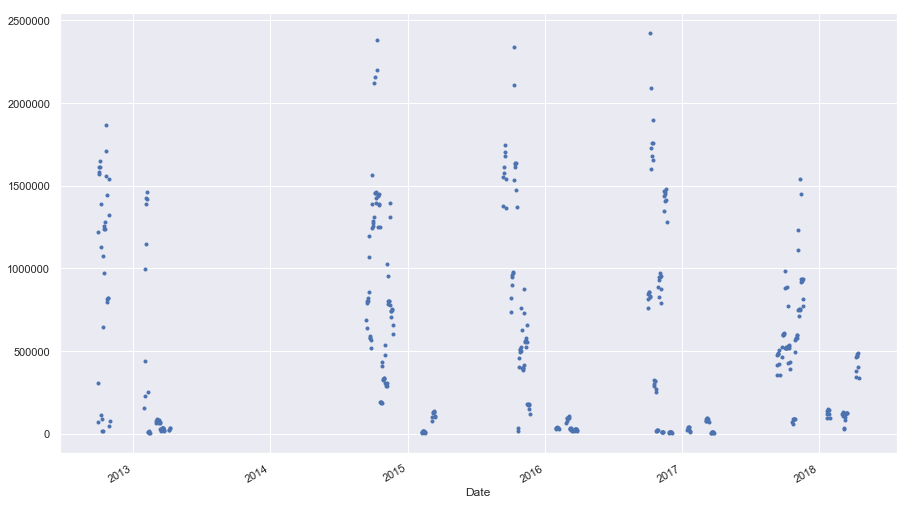

In [298]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,9))
df.groupby(['Date']).sum()["Total_Daily_Volume"].plot(style = ".b")

In [299]:
# Create df with aggregate volume for all new york per day
agg_df = df.groupby('Date').sum()

In [300]:
agg_df['Total_Daily_Volume'] = [int(x/1000) for x in agg_df['Total_Daily_Volume']]

In [301]:
agg_df = agg_df.rename(columns={'Total_Daily_Volume': 'Total_Daily_Volume(K)'})

In [302]:
agg_df.head(3)

,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,Total_Daily_Volume(K)
Date,,,,,,,,,,,,,,,
2012-09-28,3095.0,5584.00,5837.0,4793.0,4377.0,4434.0,4762,5070,6178,5918,6113,6388,6117,5451,74
2012-09-29,7320.0,11571.00,16384.0,19845.0,21715.0,23102.0,24957,25606,26039,26442,26481,25750,26051,24476,305
2012-09-30,37743.0,50905.83,60715.5,67849.0,82323.0,93594.0,100475,103440,107217,107311,104409,101898,102783,98246,1218


Text(0.5,1,'Total Hourly Volume by Day - NYC')

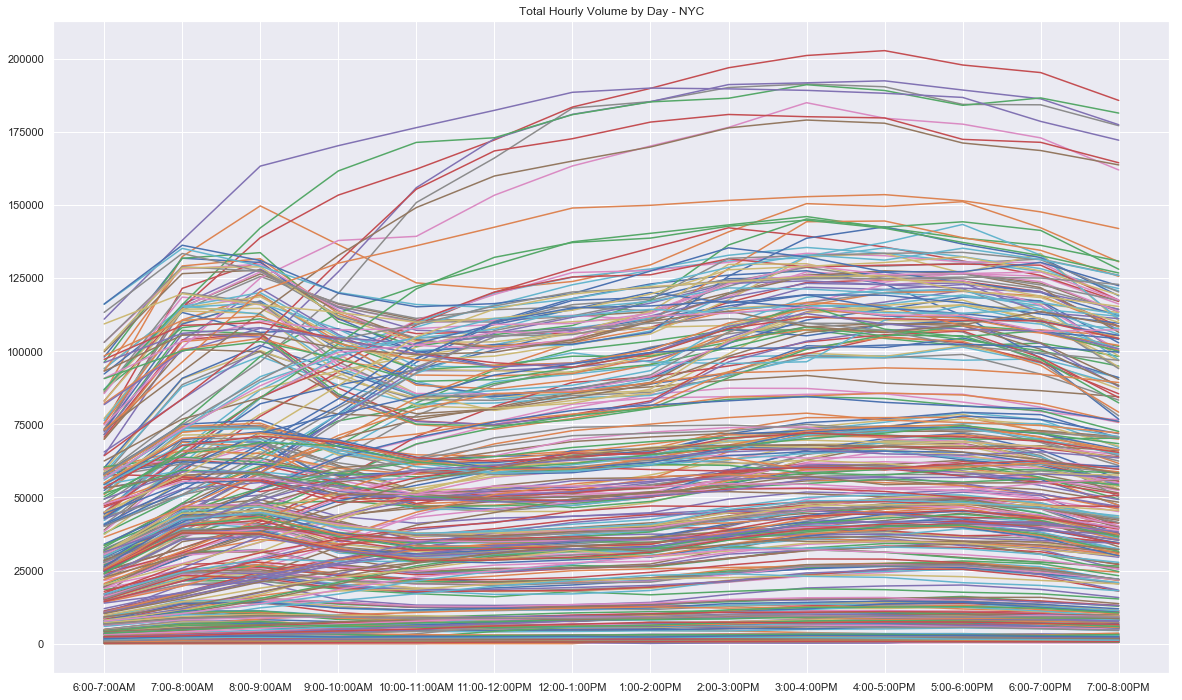

In [303]:

plt.figure(figsize = (20,12))
for i, row in agg_df.iterrows(): 
    plt.plot(row[:-1])
plt.title('Total Hourly Volume by Day - NYC')

#### The above plot shows
* hourly traffic volumes for each day. 
* There is a visible deep mid day
* There are noticable bands/clusters which needs further analysis which is out of the scope of the project. 

In [304]:
# Calculate mean volume for a day in thousands 
agg_df['Mean_Daily_Volume'] = agg_df.iloc[:,:-1].mean(axis=1)
agg_df['Mean_Daily_Volume'] = [int(x) for x in agg_df['Mean_Daily_Volume']]
agg_df.head(3)

,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,Total_Daily_Volume(K),Mean_Daily_Volume
Date,,,,,,,,,,,,,,,,
2012-09-28,3095.0,5584.00,5837.0,4793.0,4377.0,4434.0,4762,5070,6178,5918,6113,6388,6117,5451,74,5294
2012-09-29,7320.0,11571.00,16384.0,19845.0,21715.0,23102.0,24957,25606,26039,26442,26481,25750,26051,24476,305,21838
2012-09-30,37743.0,50905.83,60715.5,67849.0,82323.0,93594.0,100475,103440,107217,107311,104409,101898,102783,98246,1218,87064


In [305]:
# To simplify the process I decided to use the total daily volume in all of new york city
# Doing this does add a lot of noise to the data. 
# However, given the scope it would not have been possible to incorporate spatian analysis
 
agg_df = agg_df.drop(['6:00-7:00AM', '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM',
       '10:00-11:00AM', '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM',
       '2:00-3:00PM', '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM',
       '6:00-7:00PM', '7:00-8:00PM'], axis =1)

In [306]:
# Check for zero values
agg_df[agg_df['Mean_Daily_Volume']==0]

,Total_Daily_Volume(K),Mean_Daily_Volume
Date,,


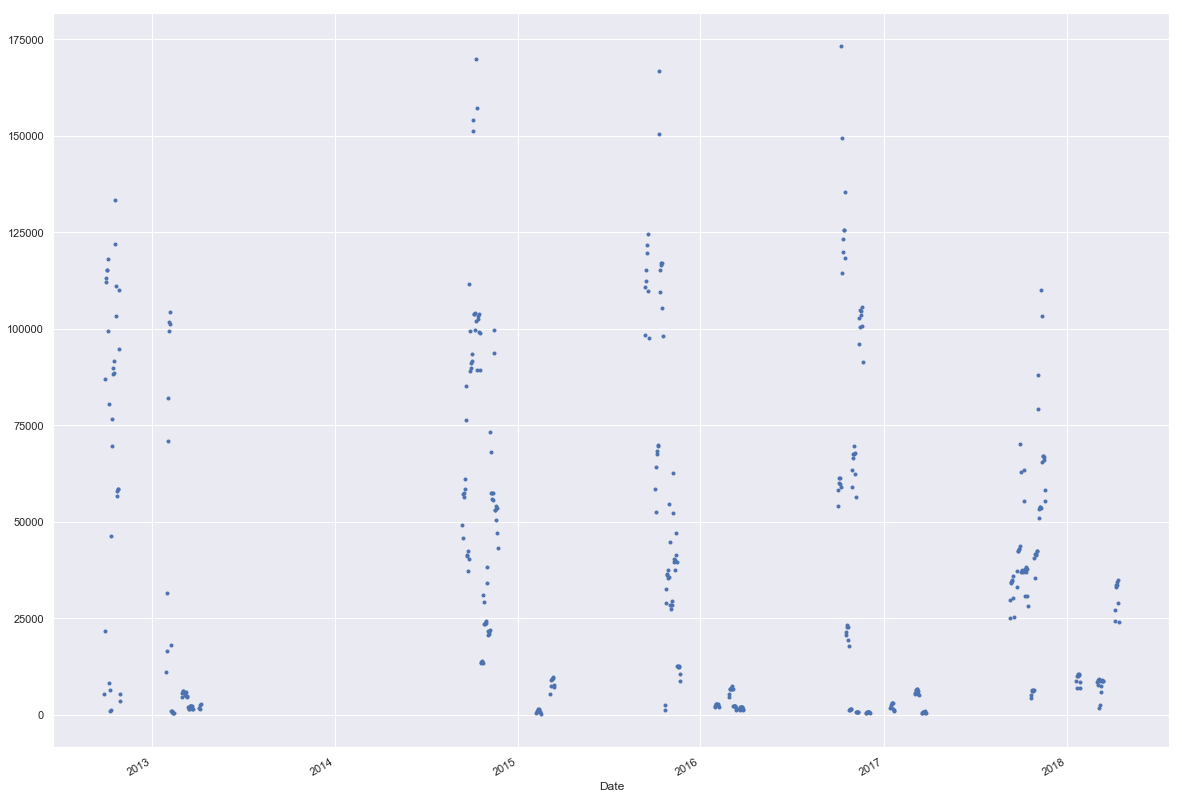

In [312]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,15))
agg_df['Mean_Daily_Volume'].plot(style = ".b")

#### The above figure shows a lot of missing days and even months. 

### Feature Engineering

Although I am not doing time series analysis due to a lot of missing data. I am aware that time definitely has an effect on traffic. To capture some of these temporal variability I extracted some new categorical features. 

* Month of year - Categorical - The numeric ID for the month of the year
* day_of_week - Categorical - The numeric ID for the day of the week. With Monday= 0 and Sunday =6
* is_weekday - Categorical - 1 =  weekday, 0  = weekend. 

 

In [307]:
# Extract Month of year from the Date index
# Extract weather if 
agg_df['Month'] = [d.month for d in agg_df.index]
agg_df['day_of_week'] = [d.weekday() for d in agg_df.index ]
agg_df['is_weekday'] = [1 if d.weekday() < 5 else 0 for d in agg_df.index ]
agg_df.head(2)

,Total_Daily_Volume(K),Mean_Daily_Volume,Month,day_of_week,is_weekday
Date,,,,,
2012-09-28,74,5294,9,4,1
2012-09-29,305,21838,9,5,0


In [308]:
# Checking the number of weekdays and weekends in the data set
agg_df.groupby('is_weekday').count()['Month']

is_weekday
0    154
1    283
Name: Month, dtype: int64

In [309]:
# Convert type of the columns to categorical
agg_df['Month'] = agg_df['Month'].astype('category')
agg_df['day_of_week'] = agg_df['day_of_week'].astype('category')
agg_df['is_weekday'] = agg_df['is_weekday'].astype('category')

In [310]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 437 entries, 2012-09-28 to 2018-04-15
Data columns (total 5 columns):
Total_Daily_Volume(K)    437 non-null int64
Mean_Daily_Volume        437 non-null int64
Month                    437 non-null category
day_of_week              437 non-null category
is_weekday               437 non-null category
dtypes: category(3), int64(2)
memory usage: 12.4 KB


In [311]:
agg_df.describe()

,Total_Daily_Volume(K),Mean_Daily_Volume
count,437.000000,437.000000
mean,573.368421,40991.395881
std,575.470911,41104.197310
min,3.000000,223.000000
25%,74.000000,5351.000000
50%,429.000000,30666.000000
75%,916.000000,65458.000000
max,2424.000000,173210.000000


### Feature Selection

In [364]:
wdf = pd.read_excel('weather.xlsx')
wdf.head(2)

,Date,Temp_Max,Temp_Avg,Temp_Min,DewPoint_Max,DewPoint_Avg,DewPoint_Min,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeed_Max,WindSpeed_Avg,WindSpeed_Min,Pressure(Hg)_Max,Pressure(Hg)_Avg,Pressure(Hg)_Min,PPT(in)_Max,PPT(in)_Avg,PPT(in)_Min,Unnamed: 19
0,2012-09-01,1,89,82,75,70,65,60,79,-,44,20,-,6.0,30.07,-,29.91,-,0,-
1,2012-09-02,2,81,77,72,70,67,65,84,-,62,13,-,4.0,30.09,-,30.01,-,0,-


In [365]:
# Convert the Date column in to pandas datetime object 
wdf['Date'] = pd.to_datetime(wdf.Date)

# Set Date columns as index
wdf = wdf.set_index('Date')

In [366]:
# Drop columns with no values 
wdf = wdf.drop(['Humidity_Avg',
                'WindSpeed_Avg', 
                'Pressure(Hg)_Avg', 
                'PPT(in)_Max', 
                'PPT(in)_Min', 
                'Unnamed: 19'], axis=1)
wdf.head(2)

,Temp_Max,Temp_Avg,Temp_Min,DewPoint_Max,DewPoint_Avg,DewPoint_Min,Humidity_Max,Humidity_Min,WindSpeed_Max,WindSpeed_Min,Pressure(Hg)_Max,Pressure(Hg)_Min,PPT(in)_Avg
Date,,,,,,,,,,,,,
2012-09-01,1,89,82,75,70,65,60,-,44,-,6.0,-,-
2012-09-02,2,81,77,72,70,67,65,-,62,-,4.0,-,-


In [367]:
wdf.shape

(1573, 13)

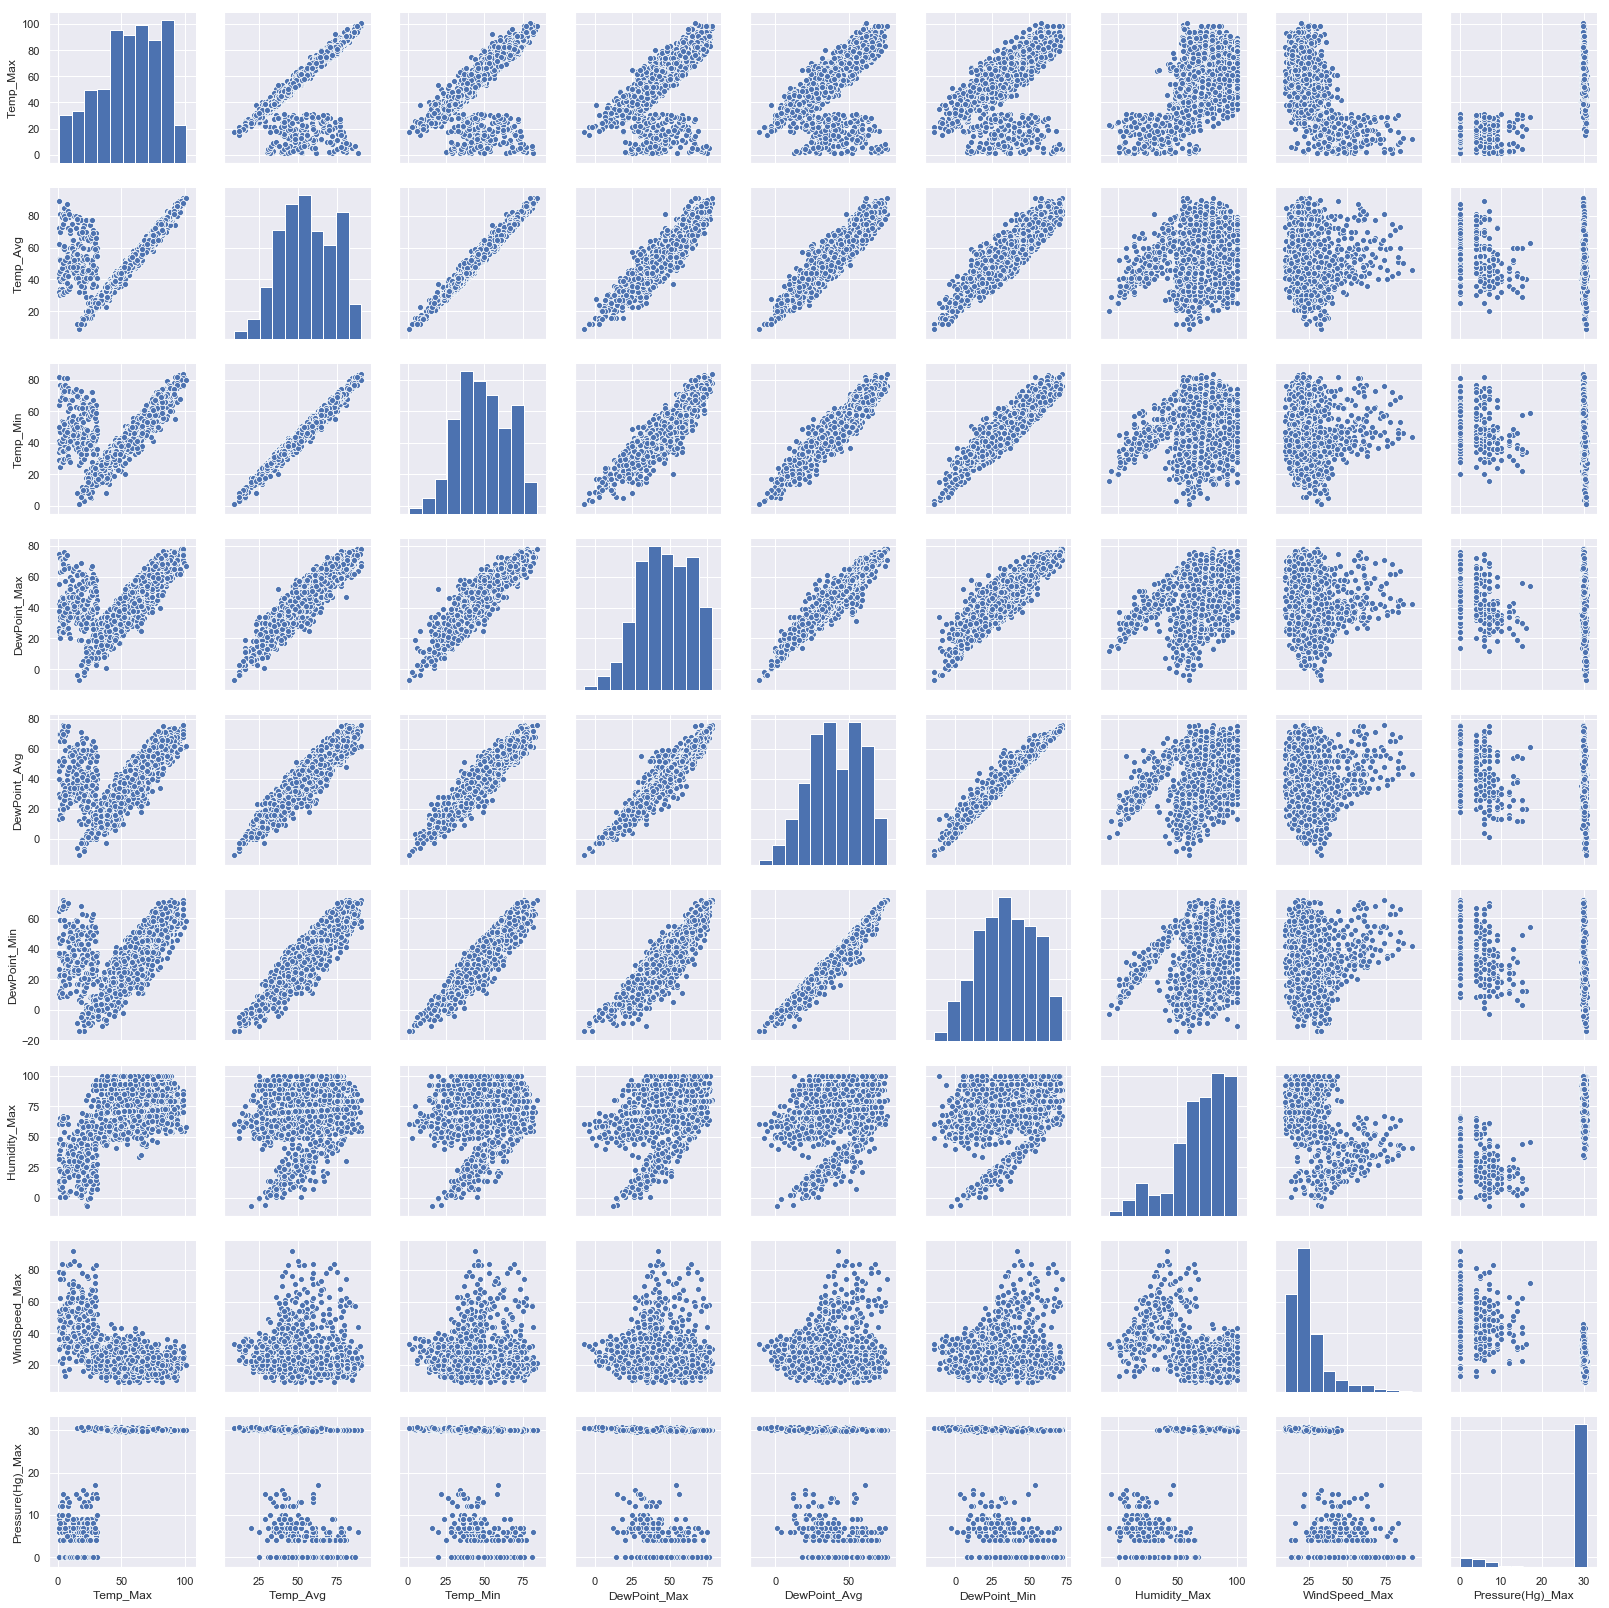

In [360]:
g = sns.pairplot(wdf)

From the above figure we see that DewPoint is highly correlated with temparature
The minimum of a feature is highly correlated with the max of the same feature. 


In [368]:
# Joining the weather date to the traffic dataset for the available dates. 
final_df = agg_df.merge(wdf, left_index=True, right_index=True)
final_df.head()

,Total_Daily_Volume(K),Mean_Daily_Volume,Month,day_of_week,is_weekday,Temp_Max,Temp_Avg,Temp_Min,DewPoint_Max,DewPoint_Avg,DewPoint_Min,Humidity_Max,Humidity_Min,WindSpeed_Max,WindSpeed_Min,Pressure(Hg)_Max,Pressure(Hg)_Min,PPT(in)_Avg
Date,,,,,,,,,,,,,,,,,,
2012-09-28,74,5294,9,4,1,28,71,67,62,65,63,59,-,81,-,4.0,-,-
2012-09-29,305,21838,9,5,0,29,65,62,59,58,55,53,-,67,-,0.0,-,-
2012-09-30,1218,87064,9,6,0,30,69,64,58,55,51,44,-,45,-,5.0,-,-
2012-10-01,1582,113049,10,0,1,1,72,64,55,52,47,45,-,41,-,0.0,-,-
2012-10-02,1569,112083,10,1,1,2,70,67,63,65,59,48,-,52,-,0.0,-,-


In [369]:
# Drop the following features to account for feature correlations
final_df = final_df.drop(['DewPoint_Max', 
               'DewPoint_Avg', 
               'DewPoint_Min', 
               'Humidity_Min', 
               'WindSpeed_Min',
               'Pressure(Hg)_Min', 
               'WindSpeed_Max'], axis =1)


Index(['Total_Daily_Volume(K)', 'Mean_Daily_Volume', 'Month', 'day_of_week',
       'is_weekday', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Humidity_Max',
       'Pressure(Hg)_Max', 'PPT(in)_Avg'],
      dtype='object')

In [370]:
# Create Heat Map of correlation accross Final_Df Columns 
corr = final_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Total_Daily_Volume(K),Mean_Daily_Volume,Temp_Max,Temp_Avg,Temp_Min,Humidity_Max,Pressure(Hg)_Max
Total_Daily_Volume(K),1,1,0.193072,0.417407,0.431959,0.0987543,-0.0236912
Mean_Daily_Volume,1,1,0.193058,0.417416,0.431964,0.0987065,-0.0237251
Temp_Max,0.193072,0.193058,1,0.518419,0.463134,0.725837,0.79716
Temp_Avg,0.417407,0.417416,0.518419,1,0.981653,0.293107,-0.0193186
Temp_Min,0.431959,0.431964,0.463134,0.981653,1,0.280167,-0.0622598
Humidity_Max,0.0987543,0.0987065,0.725837,0.293107,0.280167,1,0.726899
Pressure(Hg)_Max,-0.0236912,-0.0237251,0.79716,-0.0193186,-0.0622598,0.726899,1


#### The above plots shows: 
  - Very small correlation between both total daily volume and mean daily volume  with temp and humidity.
  - Correlation of Volume is higher with Temp_Avg than with Temp_Max
  - Both Humidity_Max and Pressure(Hg)_Max is highly correlated with Temp_Max
  - No visible correlation of the two with any other weather components
  - Total_Daily_Volume(K) and Mean_Daily_Volume have almost identical correlation number with the features 


In [323]:
final_df.head()

,Total_Daily_Volume(K),Mean_Daily_Volume,Month,day_of_week,is_weekday,Temp_Max,Temp_Avg,Temp_Min,Humidity_Max,Pressure(Hg)_Max,PPT(in)_Avg,Unnamed: 19
Date,,,,,,,,,,,,
2012-09-28,74,5294,9,4,1,28,71,67,59,4.0,-,-
2012-09-29,305,21838,9,5,0,29,65,62,53,0.0,-,-
2012-09-30,1218,87064,9,6,0,30,69,64,44,5.0,-,-
2012-10-01,1582,113049,10,0,1,1,72,64,45,0.0,-,-
2012-10-02,1569,112083,10,1,1,2,70,67,48,0.0,-,-


In [324]:
final_df.describe()

,Total_Daily_Volume(K),Mean_Daily_Volume,Temp_Max,Temp_Avg,Temp_Min,Humidity_Max,Pressure(Hg)_Max
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,573.368421,40991.395881,52.471396,54.036613,47.368421,67.725400,25.821625
std,575.470911,41104.197310,21.764107,13.106079,12.875167,23.213758,9.745275
min,3.000000,223.000000,1.000000,13.000000,4.000000,1.000000,0.000000
25%,74.000000,5351.000000,42.000000,45.000000,38.000000,56.000000,29.920000
50%,429.000000,30666.000000,57.000000,54.000000,47.000000,72.000000,30.110000
75%,916.000000,65458.000000,69.000000,64.000000,58.000000,86.000000,30.270000
max,2424.000000,173210.000000,91.000000,81.000000,73.000000,100.000000,30.740000


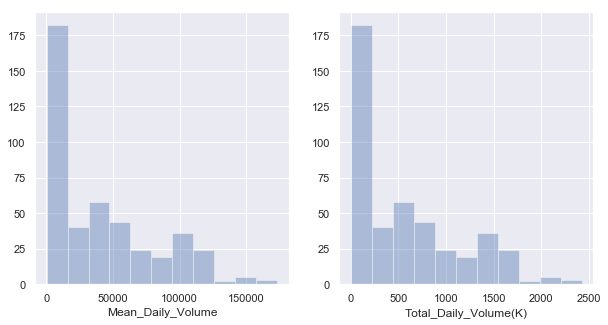

In [325]:
fig, axes = plt.subplots( figsize = (10,5), ncols=2, nrows=1)
sns.distplot(final_df['Mean_Daily_Volume'], kde = False, ax = axes[0])

sns.distplot(final_df['Total_Daily_Volume(K)'], kde = False, ax = axes[1])

#### The above plot shows 
* Both the mean daily volumes and total daily volumes are postively skewed
* This is expected as these are count data over a period of time (day, hour respectively) 
* So they follow poissson distribution 
* From this we can slowly start to think that we cannot do an OLS regression which heavily relies on the     
  assumptions of a gaussian distribution. 

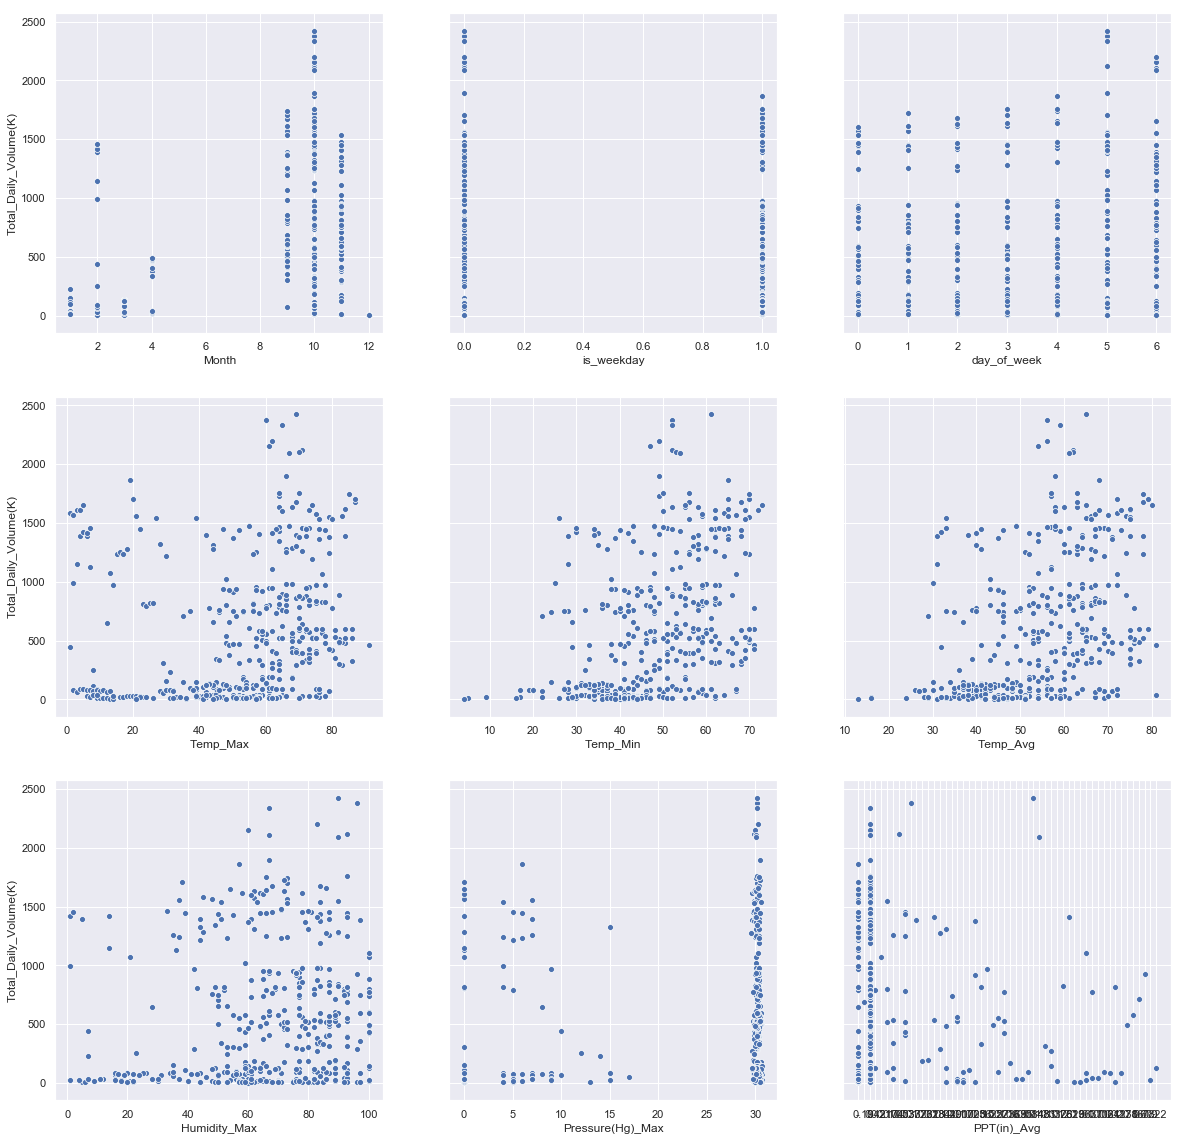

In [331]:
# Taking a closer look 
f, axes = plt.subplots(figsize=(20,20), ncols=3, nrows=3, sharey=True)

sns.relplot(x="Month", y='Total_Daily_Volume(K)', data=final_df, ax = axes[0][0])
sns.relplot(x="is_weekday", y='Total_Daily_Volume(K)', data=final_df, ax = axes[0][1])
sns.relplot(x="day_of_week", y='Total_Daily_Volume(K)', data=final_df, ax = axes[0][2])

sns.relplot(x="Temp_Max", y='Total_Daily_Volume(K)', data=final_df, ax = axes[1][0])
sns.relplot(x="Temp_Min", y='Total_Daily_Volume(K)', data=final_df, ax = axes[1][1])
sns.relplot(x="Temp_Avg", y='Total_Daily_Volume(K)', data=final_df, ax = axes[1][2])

sns.relplot(x="Humidity_Max", y='Total_Daily_Volume(K)', data=final_df, ax = axes[2][0])
sns.relplot(x="Pressure(Hg)_Max", y='Total_Daily_Volume(K)', data=final_df, ax = axes[2][1])
sns.relplot(x="PPT(in)_Avg", y='Total_Daily_Volume(K)', data=final_df, ax = axes[2][2])

for i in range(2,11):
    plt.close(i)

In [216]:
# Engineer two new features to measure extreme conditions. 
# Extreme Heat - all days that have max temp higher than 85 - based on avg high temperature in July in NYC (Hottest Month)
# Extreme Cold - all days that have min temp lower than 25 - based on avg low temperature in Jan in NYC (Coldest Month)
# Source https://www.weather-us.com/en/new-york-usa/new-york-weather-february#temperature
final_df['Extreme_Heat'] = [1 if x > 85 else 0 for x in final_df['Temp_Max']]
final_df['Extreme_Cold']= [1 if x < 25 else 0 for x in final_df['Temp_Min']]
final_df.head()

,Total_Daily_Volume(K),Mean_Daily_Volume,Month,day_of_week,is_weekday,Temp_Max,Temp_Avg,Temp_Min,Humidity_Max,Pressure(Hg)_Max,PPT(in)_Avg,Unnamed: 19,Extreme_Heat,Extreme_Cold
Date,,,,,,,,,,,,,,
2012-09-28,74,5294,9,4,1,28,71,67,59,4.0,-,-,0,0
2012-09-29,305,21838,9,5,0,29,65,62,53,0.0,-,-,0,0
2012-09-30,1218,87064,9,6,0,30,69,64,44,5.0,-,-,0,0
2012-10-01,1582,113049,10,0,1,1,72,64,45,0.0,-,-,0,0
2012-10-02,1569,112083,10,1,1,2,70,67,48,0.0,-,-,0,0


In [217]:

final_df['Extreme_Heat'] = final_df['Extreme_Heat'].astype('category')
final_df['Extreme_Cold'] = final_df['Extreme_Cold'].astype('category')

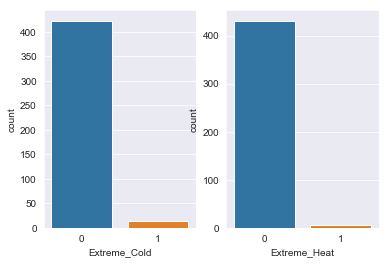

In [218]:
fig, axes = plt.subplots(  ncols=2, nrows=1)
sns.countplot(final_df.Extreme_Cold, ax = axes[0])
sns.countplot(final_df.Extreme_Heat, ax = axes[1])

### Feature Selection

In [219]:
# Drop weather columns tha did not show correlation
# Drop Temp_Min and Temp_Max because they are correlated with Temp Avg
# Drop Extreme Heat and Extreme Cold as there are not enough data points with extreme conditions
# Drop Month - Missing data for certain months
final_df = final_df.drop(['Temp_Min', 
                          'Temp_Max',
                          'Humidity_Max', 
                          'Pressure(Hg)_Max', 
                          'PPT(in)_Avg', 
                          'Month', 
                          'Extreme_Heat', 
                          'Extreme_Cold' ], axis=1)
final_df.head(3)

,Total_Daily_Volume(K),Mean_Daily_Volume,day_of_week,is_weekday,Temp_Avg,Unnamed: 19
Date,,,,,,
2012-09-28,74,5294,4,1,71,-
2012-09-29,305,21838,5,0,65,-
2012-09-30,1218,87064,6,0,69,-


In [372]:
# Comparing Mean and Variance for Mean Daily Volume
final_df['Mean_Daily_Volume'].var()/ final_df['Mean_Daily_Volume'].mean()

41217.30914937803

In [373]:
# Comparing Mean and Variance for Total Daily Volume
final_df['Total_Daily_Volume(K)'].var()/ final_df['Total_Daily_Volume(K)'].mean()


577.5811114779118

In [220]:
# Decide to use Total Daily Volume as that showed less variation compared to the mean
model_df1 = final_df.drop(['Mean_Daily_Volume'], axis =1)

In [221]:

model_df1= model_df1.rename(columns={'Total_Daily_Volume(K)': 'Total_Daily_Volume_Thousands'})

In [222]:
print(model_df1.shape)
model_df1.head(2)

(437, 5)


,Total_Daily_Volume_Thousands,day_of_week,is_weekday,Temp_Avg,Unnamed: 19
Date,,,,,
2012-09-28,74,4,1,71,-
2012-09-29,305,5,0,65,-


### FINAL INPUTS: 
* The target variable is Total Daily Volume in Thousands 
* Features are day_of_week,	is_weekday,	Temp_Avg

### MODEL

Some points to consider before deciding what kind of analysis can be done 
* The total daily volume is a count variable and as such we cannot use Ordinary Least Squares Regression. 
* For count variables that follow a poisson distribution it is common to use Poisson Regression. It is a generalized linear model. According to wikipedia 'In statistics, the generalized linear model is a flexible generalization of ordinary linear regression that allows for response variables that have error distribution models other than a normal distribution.'
* However the poisson regression assumes that the variance will be equal to the mean of the distribution. This in our case is not true. As we saw before when compared mean and variance. This is called overdispersion. Our variance is over 500 times the mean. That is a lot of variation. For these kinds of distribution the next GLM option is to try Negative Binomial Regression (NBR). 
* Another major obstacle in getting any good prediction from this data set is that we have so few examples. We have 437 days of data, which is insufficient. Usually NBR require much higher number of data.


In [231]:
# Since time is not a factor anymore for our purposes shuffling the data set to create train and test sets. 
d = model_df1
d = d.reindex(np.random.permutation(d.index)) #shuffling
print(d.shape)
d.head()

(437, 4)


,Total_Daily_Volume_Thousands,day_of_week,is_weekday,Temp_Avg
Date,,,,
2018-03-06,130,1,1,41
2012-10-03,1613,2,1,73
2017-03-10,86,4,1,38
2014-09-15,802,0,1,64
2017-01-19,41,3,1,46


In [237]:
data = d.iloc[:-37:, :]
test_data = d.iloc[-37:, :]
print(data.shape, test_data.shape)

(400, 4) (37, 4)


In [55]:
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy

patsy.__version__


'0.5.1'

To use NBR we have to apply Poison Regression first. 
The outputs from the Poisson Regression will be use to calculate a parameter for NBR. 

Source code: 'https://dius.com.au/2017/08/03/using-statsmodels-glms-to-model-beverage-consumption/

In [376]:
formula = """Total_Daily_Volume_Thousands ~ C(day_of_week) + C(is_weekday) + Temp_Avg """
response, predictors = dmatrices(formula, data, return_type='dataframe')
po_results = sm.GLM(response, predictors, family=sm.families.Poisson()).fit()
print(po_results.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     Total_Daily_Volume_Thousands   No. Observations:                  437
Model:                                      GLM   Df Residuals:                      429
Model Family:                           Poisson   Df Model:                            7
Link Function:                              log   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:            -1.0544e+05
Date:                          Tue, 23 Apr 2019   Deviance:                   2.0769e+05
Time:                                  22:26:37   Pearson chi2:                 2.20e+05
No. Iterations:                               5   Covariance Type:             nonrobust
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              

In [374]:
2.20e+05/429

512.8205128205128

#### The above outputs show: 
* 5 iterations of the IRLS algorithm before it converged on a solution with the log-likelihood of -2025. 
* Residuals: Scaled measures, of the amounts by which the response observations differ from their respective means. This cannot be interpreted as an ordinary least squares. I was not able to find a proper explanation given the time frame to interpret the residual of 429. 

For our case however we knew going in that this will not be reliable. What we are more interested in is the the ratio Pearson chi2 / Df Residuals. This value in a poisson distribution should be close to 1. If higher it points to over dispersion. In our case it is way higher at 512. Based on this without more research I am unable to interpret. However we do know that we need to move on to the next step. Which is to apply NBR. 

NBR takes as input a parameter alpha which specifies the extent by which the distribution’s variance exceeds its mean. Below we conduct a test proposed Cameron and Trivedi  to find our alpha. 

In [242]:
def ct_response(row):
    "Calculate response observation for Cameron-Trivedi dispersion test"
    y = row['Total_Daily_Volume_Thousands']
    m = row['Total_Daily_Volume_mu']
    return ((y - m)**2 - y) / m

ct_data = data.copy()
ct_data['Total_Daily_Volume_mu'] = po_results.mu
ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
# Linear regression of auxiliary formula
ct_results = smf.ols('ct_resp ~ Total_Daily_Volume_mu - 1', ct_data).fit()
# Construct confidence interval for alpha, the coefficient of bev_mu
alpha_ci95 = ct_results.conf_int(0.05).loc['Total_Daily_Volume_mu']
print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'
        .format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))


C-T dispersion test: alpha = 0.670, 95% CI = (0.535, 0.805)


In [243]:
# we use the alpha above to run our NRB. 
f = """Total_Daily_Volume_Thousands ~ C(day_of_week) + C(is_weekday) + Temp_Avg """
response, predictors = dmatrices(f, data, return_type='dataframe')
nb_results = sm.GLM(response, predictors,
                    family=sm.families.NegativeBinomial(alpha=0.670)).fit()
print(nb_results.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     Total_Daily_Volume_Thousands   No. Observations:                  437
Model:                                      GLM   Df Residuals:                      429
Model Family:                  NegativeBinomial   Df Model:                            7
Link Function:                              log   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -3235.0
Date:                          Tue, 23 Apr 2019   Deviance:                       1025.4
Time:                                  19:16:48   Pearson chi2:                     799.
No. Iterations:                               6   Covariance Type:             nonrobust
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              

In [375]:
799/429

1.8624708624708626

#### The output above shows: 
* The ratio  Pearson chi2 / Df Residuals has reduced a lot! 
* From the bottom part we see that the p value for the coefficient of Temp_Avg is signficant with a confidence interval of 95%. 
* However the coefficient is very small compared to others. 
* Interestingly weekends have a statistically significant impact on the target, but weekdays do not. 

### Testing

I use the same model to quickly run a prediction test. 
The returned  predictions are in the form of a confidence interval with alpha .05. 

In [245]:
# dmatrices breaks up the data frame into target and features 
# and also transforms the features according to the requirements for the statsmodel. 
test_response, test_predictors = dmatrices(f, test_data, return_type='dataframe')

In [252]:
predictions = nb_results.get_prediction(test_predictors).conf_int(alpha=0.05)


In [262]:
# Create a data frame of the predictions and the true_values
eval_df = pd.DataFrame(predictions.astype('int'))
eval_df['True_value'] = test_response.iloc[:, 0].values.astype('int')
eval_df.head()

,0,1,True_value
0,247,376,12
1,703,1125,33
2,369,565,334
3,639,933,2336
4,423,654,34


Text(0.5,1,'Predictions Confidence Interval vs Real Values')

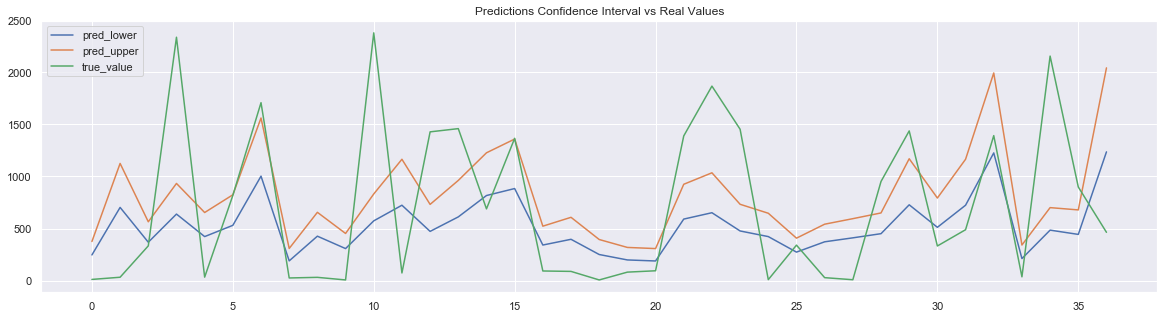

In [278]:
#Visualize

labels = 'pred_lower', 'pred_upper', 'true_value'
plt.figure(figsize = (20,5))
eval_df.iloc[:, 0].plot()
eval_df.iloc[:, 1].plot()
eval_df.iloc[:, 2].plot()

plt.legend(labels)
plt.title('Predictions Confidence Interval vs Real Values')

### Conclusion : 

The final prediction plot shows that the model was able to capture atleast the trends in the model although failing in predicting the cardinality. 

I am still not confident enough to say that my initial hypothesis was right. 
Based on the statistically significant coefficient for Temp_avg, some effect of weather is noticeable. 
However, the output of this model needs further validation. 
Only further analysis can reveal what the data has to say! 

Thank you! 



### SUMMARY: 

Null Hypothesis: Weather does not have statistically significant impact on traffic volume in NYC.

Hypotehsis: Weather has statistically significant impact on traffic volume in NYC.

Test: Test hypothesis by running a regression of traffic volument data against weather parameters. Fail to reject null hypothesis if the coefficients are statistically significant and the model is reliable.


    
Some Decisions to Simplify the Process:

* I decided to narrow down the scope of the project to the times between 6am-8pm.

    *The assumption being that during these hours commuters are most active. As such any effect of weather should be more pronounced during this window.

* For the scope of the project I also decided to narrow down analysis to the total daily volume for NYC

    * I also disregard hourly data by getting daily volume for a day. So my target or dependent variable will be Total Daily Volume for NYC on a given day

Feature Engineering: 

Although I am not doing time series analysis due to a lot of missing data. I am aware that time definitely has an effect on traffic. To capture some of these temporal variability I extracted some new categorical features.

* Month of year - Categorical - The numeric ID for the month of the year
* day_of_week - Categorical - The numeric ID for the day of the week. With Monday= 0 and Sunday =6
* is_weekday - Categorical - 1 = weekday, 0 = weekend.

Feature Selection:
S
* From correlations analysis I found following 
  - Total_Daily_Volume and Mean_Daily_Volume have almost identical correlation number with the features. 
      ###### * So I picked Total Daily Volume as the target. 
  - Very small correlation between both total daily volume volume  with avg temperature and max temperature.
  - Correlation of Volume is higher with Temp_Avg than with Temp_Max. 
  - No visible correlation of the traffic volume with any other weather components. 
      ###### * So I chose Temp_avg as the only weather feature. 

Model: 

* The total daily volume is a count variable and as such we cannot use Ordinary Least Squares Regression. 
* For count variables that follow a poisson distribution it is common to use Poisson Regression. 
* However the poisson regression assumes that the variance will be equal to the mean of the distribution. This in our case is not true. As we saw before when compared mean and variance. This is called overdispersion. Our variance is over 500 times the mean. That is a lot of variation. For these kinds of distribution the next GLM option is to try Negative Binomial Regression (NBR). 

